In [24]:
import json

In [26]:
data = {}
with open('validators.json','r') as f:
    data = json.load(f)['data']

In [27]:
print(f"{len(data)} validators")

10044 validators


In [28]:
nodes = set()
for i in range(len(data)):
    for operator in data[i]['committee']:
        nodes.add(operator)
print(nodes)
print(f"{len(nodes)} operators")

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 78, 80, 85, 89}
78 operators


In [29]:
subnets = set()
for i in range(len(data)):
     p = data[i]['public_key']
     s = int(p[:10], 16) % 128
     subnets.add(s)
print(subnets)
print(f"{len(subnets)} subnets")

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}
128 subnets


In [30]:
subnets_count = [0]*128
for i in range(len(subnets)):
    subnets_count[i] = set()
for i in range(len(data)):
    p = data[i]['public_key']
    s = int(p[:10], 16) % 128
    for op in data[i]['committee']:
        subnets_count[s].add(op)

for i in range(len(subnets)):
    subnets_count[i] = len(subnets_count[i])

print(subnets_count)

import statistics

print(f"{statistics.mean(subnets_count)} operators per subnet on average")
print(f"{statistics.stdev(subnets_count)} standard deviation")

[72, 72, 72, 72, 72, 68, 76, 72, 72, 72, 68, 68, 68, 64, 68, 68, 68, 74, 68, 75, 75, 68, 72, 72, 72, 72, 72, 72, 72, 72, 68, 61, 72, 72, 72, 72, 73, 72, 72, 72, 76, 72, 72, 72, 72, 68, 76, 72, 72, 72, 72, 72, 64, 68, 72, 72, 68, 72, 76, 72, 72, 72, 72, 72, 64, 76, 72, 68, 68, 72, 68, 72, 72, 72, 72, 72, 72, 72, 72, 72, 68, 72, 72, 72, 72, 72, 72, 68, 72, 72, 72, 73, 72, 72, 74, 76, 73, 68, 72, 72, 64, 72, 72, 68, 75, 72, 64, 68, 72, 72, 76, 72, 72, 72, 64, 72, 72, 72, 72, 72, 72, 72, 68, 68, 73, 72, 72, 72]
71.171875 operators per subnet on average
2.7151061086267627 standard deviation


In [35]:
subnets_validators = {}
for i in range(len(data)):
     p = data[i]['public_key']
     s = int(p[:10], 16) % 128
     if s not in subnets_validators:
          subnets_validators[s] = set()
     subnets_validators[s].add(p)
for s in subnets_validators:
     subnets_validators[s] = len(subnets_validators[s])
print(subnets_validators)
import statistics
print(f"{statistics.mean([subnets_validators[s] for s in subnets_validators])} validators per subnets")
print(f"{statistics.stdev([subnets_validators[s] for s in subnets_validators])} standard deviation")

{33: 73, 36: 80, 107: 74, 78: 79, 35: 84, 67: 65, 103: 77, 123: 91, 97: 70, 121: 77, 64: 71, 43: 78, 111: 74, 18: 87, 40: 73, 14: 76, 60: 83, 20: 90, 21: 59, 99: 80, 3: 92, 115: 84, 117: 82, 55: 90, 47: 88, 85: 74, 34: 78, 108: 90, 6: 75, 44: 71, 15: 61, 83: 81, 0: 77, 127: 73, 100: 74, 112: 78, 27: 99, 92: 84, 73: 71, 96: 85, 56: 64, 68: 73, 58: 77, 105: 91, 63: 89, 26: 80, 2: 68, 98: 72, 102: 87, 48: 82, 32: 81, 114: 62, 104: 94, 8: 83, 12: 94, 106: 76, 72: 86, 59: 79, 4: 82, 28: 77, 53: 90, 95: 76, 13: 61, 16: 78, 17: 95, 90: 84, 5: 79, 91: 75, 77: 73, 57: 82, 113: 87, 49: 92, 42: 102, 41: 74, 110: 89, 69: 87, 11: 66, 74: 73, 37: 78, 119: 83, 39: 73, 25: 79, 82: 78, 38: 79, 29: 84, 52: 62, 76: 76, 79: 77, 19: 69, 31: 56, 65: 75, 66: 82, 51: 71, 124: 71, 9: 81, 22: 88, 23: 84, 30: 74, 1: 64, 70: 72, 50: 82, 125: 79, 122: 73, 86: 74, 24: 88, 93: 68, 7: 83, 120: 86, 84: 69, 87: 69, 62: 101, 10: 83, 116: 72, 81: 73, 75: 85, 45: 84, 46: 73, 71: 87, 118: 68, 54: 77, 61: 87, 80: 64, 94: 74

In [37]:
operator_subnets = {}

for i in range(len(data)):
    p = data[i]['public_key']
    s = int(p[:10], 16) % 128
    for op in data[i]['committee']:
        if op not in operator_subnets:
            operator_subnets[op] = set()
        operator_subnets[op].add(s)

for op in operator_subnets:
    operator_subnets[op] = len(operator_subnets[op])

import statistics
print(operator_subnets)
print(f"{statistics.mean(operator_subnets.values())} subnets per operator")

print(f"{statistics.stdev(operator_subnets.values())} standard deviation")

{61: 124, 62: 124, 63: 124, 64: 124, 49: 127, 50: 127, 51: 127, 52: 127, 25: 125, 26: 125, 27: 125, 28: 125, 33: 127, 34: 127, 35: 127, 36: 127, 9: 128, 10: 128, 11: 128, 12: 128, 21: 125, 22: 125, 23: 125, 24: 125, 65: 126, 66: 126, 67: 126, 68: 126, 57: 124, 58: 124, 59: 124, 60: 124, 13: 127, 14: 127, 15: 127, 16: 127, 17: 124, 18: 124, 19: 124, 20: 124, 1: 127, 2: 127, 3: 127, 4: 127, 69: 125, 70: 125, 71: 125, 72: 125, 53: 124, 54: 124, 55: 124, 56: 124, 37: 125, 38: 125, 39: 125, 40: 125, 41: 128, 42: 128, 43: 128, 44: 128, 29: 126, 30: 126, 31: 126, 32: 126, 5: 126, 6: 126, 7: 126, 8: 126, 45: 127, 46: 127, 47: 127, 48: 127, 73: 10, 74: 7, 78: 11, 80: 8, 85: 6, 89: 8}
116.7948717948718 subnets per operator
31.54315080917509 standard deviation


## Summary
- 10044 validatos
- 128 subnets
- 78 operators
- 71 +- 3 operators per subnet
- 117 +- 31 subnets per operator
- 78 +- 9 validators per subnet

In [62]:
import random

def is_fully_connected(graph, n):
    visited = [False] * n

    def dfs(node):
        visited[node] = True
        for neighbor in graph[node]:
            if not visited[neighbor]:
                dfs(neighbor)

    dfs(0)
    return all(visited)

def simulate_network(num_nodes, num_peers, num_simulations):
    fully_connected_count = 0.0

    for _ in range(num_simulations):
        graph = [[] for _ in range(num_nodes)]

        for node in range(0, num_nodes):
            available_nodes = list(range(num_nodes))
            random.shuffle(available_nodes)

            for _ in range(num_peers):
                if len(graph[node]) < num_peers:
                    if available_nodes:
                        peer = available_nodes.pop()
                        if len(graph[peer]) < num_peers:
                            graph[node].append(peer)
                            graph[peer].append(node)
        

        if is_fully_connected(graph, num_nodes):
            fully_connected_count += 1.0

    probability = fully_connected_count / float(num_simulations)
    return probability

if __name__ == "__main__":
    for num_peers in range(1,14): # Number of peers each node connects to
        num_nodes = 1000  # Total number of nodes
        num_simulations = 100  # Number of simulations to run

        probability = simulate_network(num_nodes, num_peers, num_simulations)
        print(f"Estimated probability of a fully connected network with D = {num_peers}: {probability}")


Estimated probability of a fully connected network with D = 1: 0.0
Estimated probability of a fully connected network with D = 2: 0.0
Estimated probability of a fully connected network with D = 3: 0.0
Estimated probability of a fully connected network with D = 4: 0.01
Estimated probability of a fully connected network with D = 5: 0.21
Estimated probability of a fully connected network with D = 6: 0.69
Estimated probability of a fully connected network with D = 7: 0.88
Estimated probability of a fully connected network with D = 8: 0.94
Estimated probability of a fully connected network with D = 9: 0.99
Estimated probability of a fully connected network with D = 10: 0.99
Estimated probability of a fully connected network with D = 11: 1.0
Estimated probability of a fully connected network with D = 12: 1.0
Estimated probability of a fully connected network with D = 13: 1.0


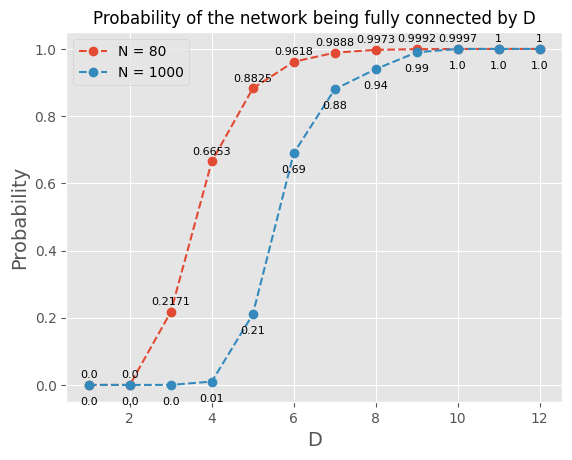

In [69]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
p_80 = [0.0,0.0,0.2171,0.6653,0.8825,0.9618,0.9888,0.9973,0.9992,0.9997,1,1]
p_1000 = [0.0,0.0,0.0,0.01,0.21,0.69,0.88,0.94,0.99,1.0,1.0,1.0]

import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.plot(x,p_80,linestyle="--",marker="o",label = "N = 80")
plt.plot(x,p_1000,linestyle="--",marker="o",label = "N = 1000")
plt.xlabel("D",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.legend()
plt.title("Probability of the network being fully connected by D",fontsize=12)
for i in range(len(x)):
    # plt.text(x[i]-0.5,p[i]-0.05,str(p[i]),)
    plt.annotate(str(p_80[i]),xy=(x[i],p_80[i]+0.03),
        horizontalalignment='center',
        verticalalignment='center',fontsize=8)
    # plt.text(x[i]-0.5,p[i]-0.05,str(p[i]),)
    plt.annotate(str(p_1000[i]),xy=(x[i],p_1000[i]-0.05),
        horizontalalignment='center',
        verticalalignment='center',fontsize=8)
plt.show()